<a href="https://colab.research.google.com/github/joreilly86/Machine-Learning-for-Structural-Engineers/blob/main/flocode_stress_strain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stress and Strain in Structural Engineering: Interactive Examples

This Jupyter notebook accompanies the article "#035 - Stress and Strain in Structural Engineering: A Refresher" from [flocode.substack.com](https://flocode.substack.com).

## Introduction

This notebook contains interactive Python code examples that illustrate key concepts of stress and strain in structural engineering. By running and modifying these code cells, you can:

- Calculate stress and strain
- Visualize stress-strain relationships
- Explore Mohr's Circle
- Experiment with machine learning models for predicting material behavior

Feel free to modify the code, change parameters, and observe how the results change. This hands-on approach will help reinforce your understanding of these fundamental engineering concepts.

James 🌊

In [7]:
# Function to calculate stress
def calculate_stress(force, area):
    return force / area

# Function to calculate strain
def calculate_strain(delta_length, original_length):
    return delta_length / original_length

# Example usage
force = 5000  # Newtons
area = 50  # mm²
delta_length = 0.2  # mm
original_length = 1000  # mm

stress = calculate_stress(force, area)
strain = calculate_strain(delta_length, original_length)

print(f"Stress: {stress} N/mm²")
print(f"Strain: {strain}")

Stress: 100.0 N/mm²
Strain: 0.0002


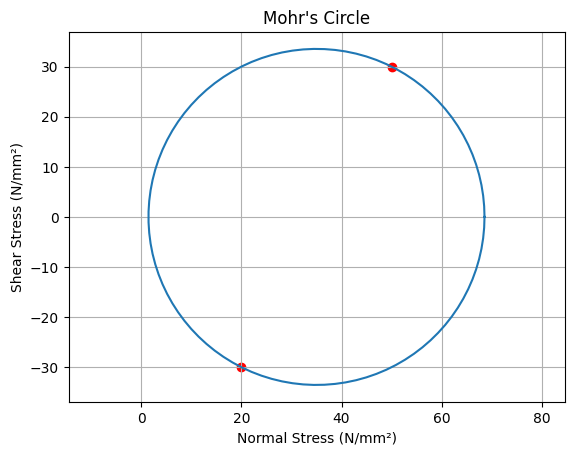

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Mohr's Circle parameters
def mohrs_circle(sigma_x, sigma_y, tau_xy):
    center = (sigma_x + sigma_y) / 2
    radius = np.sqrt(((sigma_x - sigma_y) / 2) ** 2 + tau_xy ** 2)
    return center, radius

# Example usage
sigma_x = 50  # N/mm²
sigma_y = 20  # N/mm²
tau_xy = 30  # N/mm²

center, radius = mohrs_circle(sigma_x, sigma_y, tau_xy)
theta = np.linspace(0, 2 * np.pi, 100)
x = center + radius * np.cos(theta)
y = radius * np.sin(theta)

# Plotting Mohr's Circle
plt.plot(x, y)
plt.scatter([sigma_x, sigma_y], [tau_xy, -tau_xy], color='red')
plt.xlabel('Normal Stress (N/mm²)')
plt.ylabel('Shear Stress (N/mm²)')
plt.title("Mohr's Circle")
plt.grid(True)
plt.axis('equal')
plt.show()

In [9]:
# Function to calculate factor of safety
def calculate_factor_of_safety(ultimate_strength, applied_stress):
    return ultimate_strength / applied_stress

# Example usage
ultimate_strength = 250  # N/mm² (e.g., for a particular grade of steel)
applied_stress = 150  # N/mm² (calculated from load and cross-sectional area)

factor_of_safety = calculate_factor_of_safety(ultimate_strength, applied_stress)

print(f"Factor of Safety: {factor_of_safety:.2f}")

Factor of Safety: 1.67


Mean Squared Error: 14187621.96
R-squared Score: 0.9998


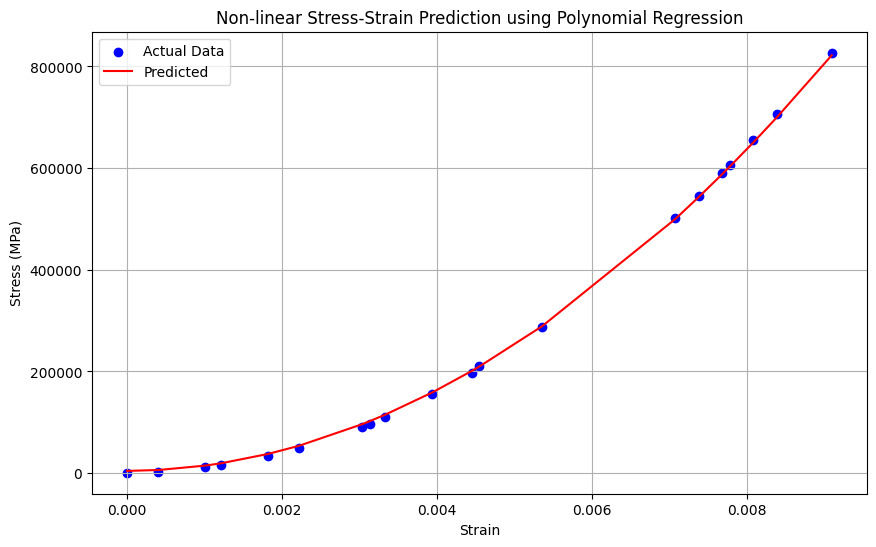

Predicted Stress for strain 0.012: 1427255.00 MPa


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic stress-strain data with clear non-linear behavior
strain = np.linspace(0, 0.01, 100).reshape(-1, 1)
stress = 200000 * strain + 1e10 * strain**2 + np.random.normal(0, 1000, strain.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(strain, stress, test_size=0.2, random_state=42)

# Create and train the model
degree = 2  # Polynomial degree
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree),
    Ridge(alpha=1.0)
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Sort the test data for a smooth curve
sort_idx = np.argsort(X_test.ravel())
X_test_sorted = X_test[sort_idx]
y_pred_sorted = y_pred[sort_idx]

plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.title('Non-linear Stress-Strain Prediction using Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

# Predict stress for a new strain value
new_strain = np.array([[0.012]])
predicted_stress = model.predict(new_strain)
print(f"Predicted Stress for strain 0.012: {predicted_stress.item():.2f} MPa")